Atividades Ciência de Dados

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [60]:
df = pd.read_csv('slr12.csv', sep = ';')
df

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300
5,1150,1300
6,1250,1400
7,1150,1400
8,1100,1250
9,1350,1830


Modelo de regressão linear simples com SkLearn

In [61]:
X = df['FrqAnual'].values
y = df['CusInic'].values
df.corr()

,FrqAnual,CusInic
FrqAnual,1.000000,0.477007
CusInic,0.477007,1.000000


In [62]:
X = X.reshape(-1, 1) 
modelo = LinearRegression()
modelo.fit(X,y)

LinearRegression()

In [63]:
modelo.intercept_

867.6042222620558

In [64]:
modelo.coef_

array([0.37315794])

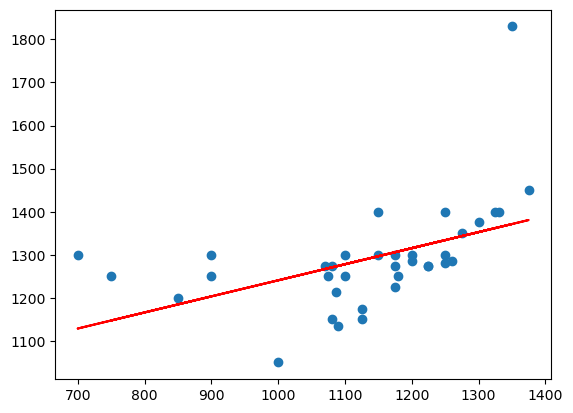

In [65]:
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

Prevendo o custo inicial com o frequência anual no valor de 1300

In [66]:
modelo.predict([[1300]])

array([1352.70953897])

Usando StatsModels

In [67]:
results = sm.ols(formula = ' CusInic ~ FrqAnual ', data = df)
results = results.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CusInic   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     10.01
Date:                Wed, 03 Jan 2024   Prob (F-statistic):            0.00327
Time:                        13:50:14   Log-Likelihood:                -219.47
No. Observations:                  36   AIC:                             442.9
Df Residuals:                      34   BIC:                             446.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    867.6042    135.071      6.423      0.000     593.107    1142.102
FrqAnual       0.3732      0.118      3.165      0.003       0.134       0.613
==============================================================================
Omnibus:                       32.231   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.481
Skew:                           1.975   Prob(JB):                     1.12e-21
Kurtosis:                       9.979   Cond. No.                     8.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""